In [4]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

### Model 1:

This first model, I will do a very basic linear regression for the variables with the highest pairwise correlation with Sale Price, and no multicollinearity across independent variables. No transformation, engineering, or regularization was conducted - this was a warm up analysis.

In [8]:
%store -r df
df_no_na = df.dropna(subset = ['Garage Cars', 'Garage Area', 'Total Bsmt SF'])

In [26]:
%store -r df_test
df_test_no_na = df_test.dropna(subset = ['Garage Cars', 'Garage Area', 'Total Bsmt SF'])
%store df_test_no_na

Stored 'df_test_no_na' (DataFrame)


In [9]:
features = ["Overall Qual", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Cars"] #remove Garage Area (has 0.89 correlation with Garage Cars)
X = df_no_na[features]
y = df_no_na["SalePrice"]

In [10]:
lr = LinearRegression()

In [11]:
#build the same model with the test data
X_totest = df_test_no_na[features]

In [12]:
lr.fit(X,y) #fit model

LinearRegression()

In [13]:
lr.intercept_

-105361.45444682878

In [14]:
pd.DataFrame(zip(X.columns,lr.coef_))

,0,1
0,Overall Qual,24734.130769
1,Total Bsmt SF,22.068175
2,1st Flr SF,17.126672
3,Gr Liv Area,40.741567
4,Garage Cars,17608.821124


In [15]:
lr.score(X, y) #score model (r2)

0.7770619607319252

In [16]:
y_predict = lr.predict(X_totest)
#use test values to predict y values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
y_pred = lr.predict(X_test) #validate model

In [19]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [20]:
print(f"train_data r^2: {lr.score(X,y)}.")
print(f"validation_data r^2: {lr.score(X_test, y_test)}.")
print(f"root mean squared error: {rmse}.")

train_data r^2: 0.7770619607319252.
validation_data r^2: 0.818451266024796.
root mean squared error: 33980.0738413484.


In [21]:
lr_predict = lr.predict(X_totest) #y values for test file using current model

In [22]:
submission1 = pd.DataFrame(df_test, columns=["Id"])
submission1["SalePrice"] = lr_predict

In [24]:
submission1.to_csv('./datasets/submission1.csv', index=False)

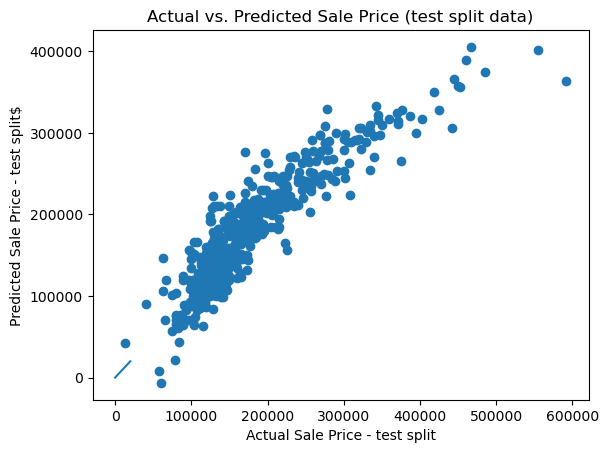

In [25]:
plt.scatter(y_test, y_pred)
plt.plot(range(20000), range(20000))

plt.xlabel("Actual Sale Price - test split")
plt.ylabel("Predicted Sale Price - test split$")
plt.title("Actual vs. Predicted Sale Price (test split data)")

plt.show()